<a href="https://colab.research.google.com/github/ANANDA-SWAROOP/data_analytics_anandaswaroop/blob/main/sigma_data_ayts_ananda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Task - 1
### implementation of logistic regression (one feature threshold boundary)

Dataset loaded successfully with 100 samples

First 5 rows of the dataset:
    feature  label
0  5.355344      1
1  0.275082      0
2  1.765847      0
3  0.671814      0
4  4.537901      1

Column names: ['feature', 'label']

Data split into 80 training samples and 20 testing samples
Cost after iteration 0: 0.7803822018685986
Cost after iteration 100: 0.5335810525665923
Cost after iteration 200: 0.49730263931941165
Cost after iteration 300: 0.48071824134034813
Cost after iteration 400: 0.47234191609295206
Cost after iteration 500: 0.4678126895857303
Cost after iteration 600: 0.4652440284489844
Cost after iteration 700: 0.46373650779882375
Cost after iteration 800: 0.4628291933188215
Cost after iteration 900: 0.4622727059007047


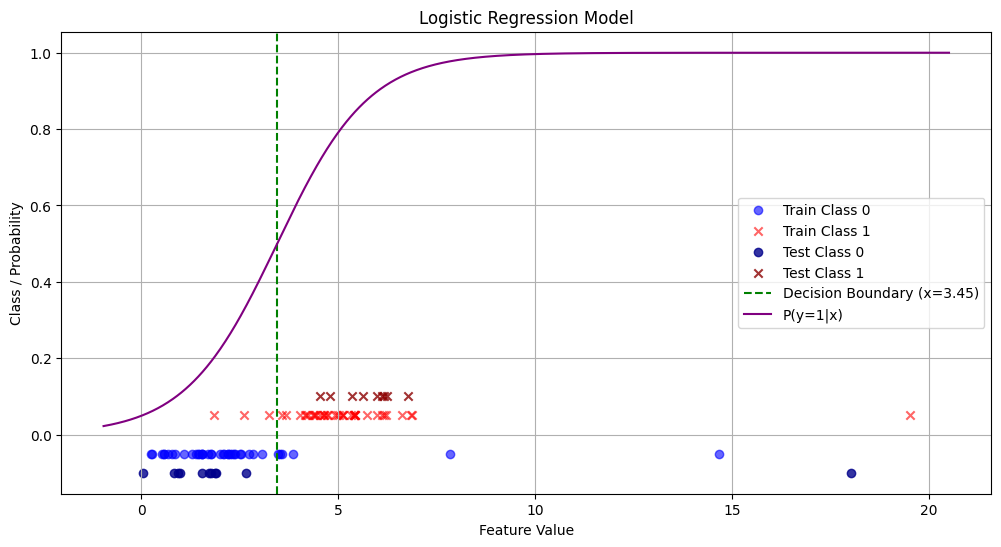

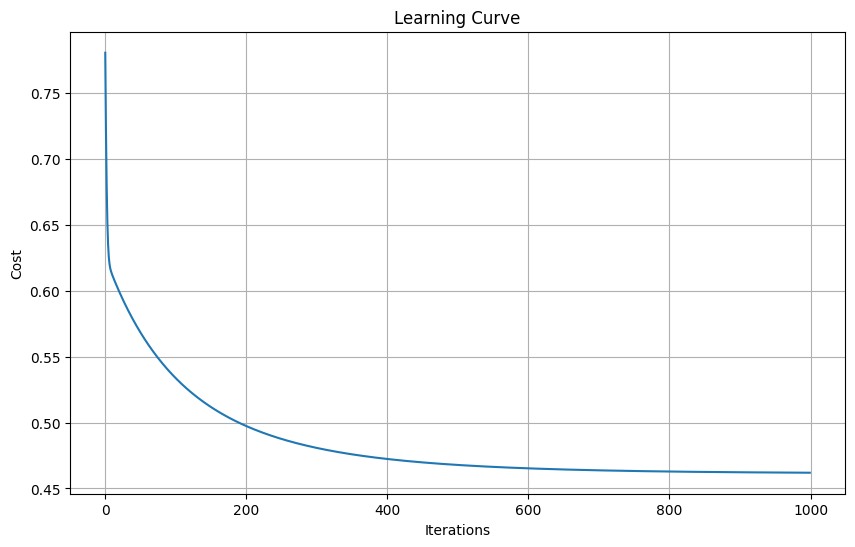

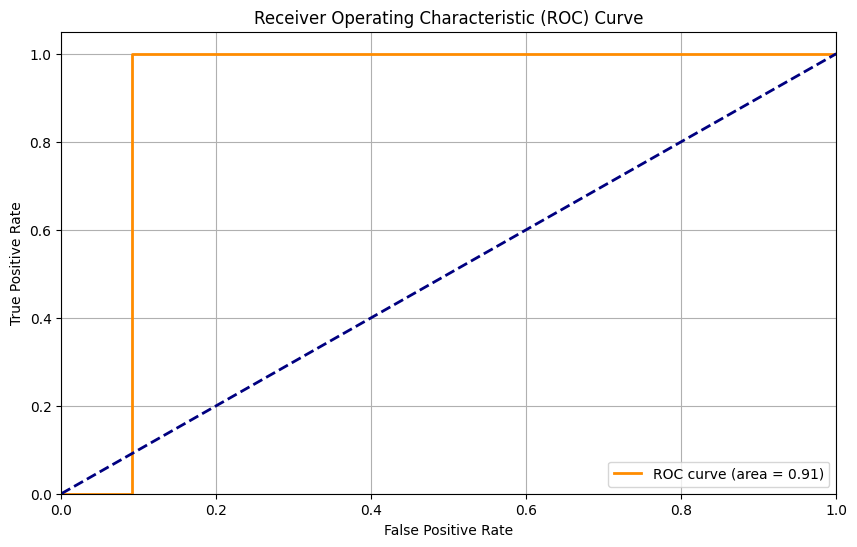


--- Model Evaluation ---
Accuracy: 0.9500
AUC-ROC: 0.9091

Confusion Matrix:
[[10  1]
 [ 0  9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20


Final model parameters:
w = 0.8593
b = -2.9629
Decision boundary at x = 3.4482


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# LogisticRegression class
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=10):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w = None
        self.b = None
        self.loss_history = []

    def sigmoid(self, z):
        """Sigmoid activation function"""
        # Clip z to avoid overflow in exp
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, X):
        """Initialize parameters w and b"""
        # Initialize w to small random values and b to 0
        self.w = np.random.randn()
        self.b = 0

    def forward_propagation(self, X):
        """Forward propagation: compute the model output"""
        z = self.w * X + self.b
        y_pred = self.sigmoid(z)
        return y_pred

    def compute_cost(self, y_pred, y):
        """Compute the binary cross-entropy cost"""
        m = len(y)
        # Avoid log(0) by adding a small epsilon
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        cost = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost

    def backward_propagation(self, X, y, y_pred):
        """Compute gradients using backward propagation"""
        m = len(y)
        # Compute gradients
        dw = 1/m * np.sum((y_pred - y) * X)
        db = 1/m * np.sum(y_pred - y)
        return dw, db

    def update_parameters(self, dw, db):
        """Update parameters using gradient descent"""
        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db

    def fit(self, X, y):
        """Train the logistic regression model"""
        # Initialize parameters
        self.initialize_parameters(X)

        # Gradient descent
        for i in range(self.n_iterations):
            # Forward propagation
            y_pred = self.forward_propagation(X)

            # Compute cost
            cost = self.compute_cost(y_pred, y)
            self.loss_history.append(cost)

            # Backward propagation
            dw, db = self.backward_propagation(X, y, y_pred)

            # Update parameters
            self.update_parameters(dw, db)

            # Print cost every 100 iterations
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")

    def predict_proba(self, X):
        """Predict probability of class 1"""
        return self.forward_propagation(X)

    def predict(self, X, threshold=0.5):
        """Predict class labels"""
        y_pred_proba = self.predict_proba(X)
        y_pred = (y_pred_proba >= threshold).astype(int)
        return y_pred

    def decision_boundary(self):
        """Return the decision boundary point for visualization"""
        # Decision boundary is where w*x + b = 0
        # So x = -b/w
        if self.w == 0:
            return 0  # Avoid division by zero
        return -self.b / self.w

# Dataset loading and preparation
def load_dataset(file_path, test_size=0.2, random_state=42):
    """
    Load dataset from a CSV file and split it into training and testing sets

    Parameters:
    file_path (str): Path to the CSV file
    test_size (float): Proportion of the dataset to include in the test split
    random_state (int): Random seed for reproducibility

    Returns:
    X_train, X_test, y_train, y_test: Split data
    """
    # Load the dataset
    try:
        data = pd.read_csv('https://raw.githubusercontent.com/ANANDA-SWAROOP/data_analytics_anandaswaroop/refs/heads/main/binary_classification_dataset.csv')
        print(f"Dataset loaded successfully with {data.shape[0]} samples")

        # Display the first few rows
        print("\nFirst 5 rows of the dataset:")
        print(data.head())

        # Check column names
        print("\nColumn names:", data.columns.tolist())

        # Assuming the first column is the feature and the second is the label
        # Adjust these indices based on your actual data
        X = data.iloc[:, 0].values  # First column as feature
        y = data.iloc[:, 1].values  # Second column as labels

        # Check for binary labels
        unique_labels = np.unique(y)
        if not np.array_equal(unique_labels, [0, 1]) and not np.array_equal(unique_labels, [0]) and not np.array_equal(unique_labels, [1]):
            print(f"Warning: Expected binary labels (0, 1), but found {unique_labels}")

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        print(f"\nData split into {X_train.shape[0]} training samples and {X_test.shape[0]} testing samples")

        return X_train, X_test, y_train, y_test

    except Exception as e:
        print(f"Error loading dataset: {e}")
        # Return a small synthetic dataset as fallback
        return generate_synthetic_fallback()

def generate_synthetic_fallback():
    """Generate a synthetic dataset as fallback when file loading fails"""
    print("Generating synthetic dataset as fallback...")

    # Generate feature values
    X = np.random.uniform(-5, 5, 100)

    # True decision boundary at x = 1
    true_boundary = 1

    # Generate labels with some noise
    y_clean = (X > true_boundary).astype(int)

    # Add noise to labels
    noise_mask = np.random.random(100) < 0.1
    y = np.copy(y_clean)
    y[noise_mask] = 1 - y[noise_mask]  # Flip labels for noise points

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    return X_train, X_test, y_train, y_test

# Visualization functions
def plot_dataset_and_model(X_train, y_train, X_test, y_test, model, title="Logistic Regression Model"):
    """Plot the dataset and logistic regression model"""
    plt.figure(figsize=(12, 6))

    # Plot training data
    plt.scatter(X_train[y_train == 0], np.zeros(sum(y_train == 0)) - 0.05,
                color='blue', marker='o', label='Train Class 0', alpha=0.6)
    plt.scatter(X_train[y_train == 1], np.zeros(sum(y_train == 1)) + 0.05,
                color='red', marker='x', label='Train Class 1', alpha=0.6)

    # Plot test data
    plt.scatter(X_test[y_test == 0], np.zeros(sum(y_test == 0)) - 0.1,
                color='darkblue', marker='o', label='Test Class 0', alpha=0.8)
    plt.scatter(X_test[y_test == 1], np.zeros(sum(y_test == 1)) + 0.1,
                color='darkred', marker='x', label='Test Class 1', alpha=0.8)

    # Plot decision boundary
    boundary = model.decision_boundary()
    plt.axvline(x=boundary, color='green', linestyle='--',
                label=f'Decision Boundary (x={boundary:.2f})')

    # Plot probability curve
    x_min, x_max = min(np.min(X_train), np.min(X_test)) - 1, max(np.max(X_train), np.max(X_test)) + 1
    x_range = np.linspace(x_min, x_max, 1000)
    probabilities = model.predict_proba(x_range)
    plt.plot(x_range, probabilities, color='purple', label='P(y=1|x)')

    plt.xlabel('Feature Value')
    plt.ylabel('Class / Probability')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_learning_curve(model):
    """Plot the learning curve (cost vs iterations)"""
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(model.loss_history)), model.loss_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Learning Curve')
    plt.grid(True)
    plt.show()

def plot_roc_curve(y_true, y_scores):
    """Plot ROC curve"""
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return roc_auc

def evaluate_model(model, X_test, y_test):
    """Evaluate the model performance with detailed metrics"""
    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Basic metrics
    accuracy = np.mean(y_pred == y_test)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # ROC curve and AUC
    roc_auc = plot_roc_curve(y_test, y_pred_proba)

    # Classification report
    class_report = classification_report(y_test, y_pred)

    # Print results
    print("\n--- Model Evaluation ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")

    print("\nConfusion Matrix:")
    print(conf_matrix)

    print("\nClassification Report:")
    print(class_report)

# Main execution
if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)

    # Load and prepare dataset
    # Replace 'your_dataset.csv' with the actual path to your dataset
    X_train, X_test, y_train, y_test = load_dataset('your_dataset.csv')

    # Create and train logistic regression model
    model = LogisticRegression(learning_rate=0.1, n_iterations=1000)
    model.fit(X_train, y_train)

    # Plot results
    plot_dataset_and_model(X_train, y_train, X_test, y_test, model)
    plot_learning_curve(model)

    # Evaluate model
    evaluate_model(model, X_test, y_test)

    # Print model parameters
    print("\nFinal model parameters:")
    print(f"w = {model.w:.4f}")
    print(f"b = {model.b:.4f}")
    print(f"Decision boundary at x = {model.decision_boundary():.4f}")

###Task2 part a - logistic regression

###an accuracy comparision is done at last before cnn with bonus models (KNN,Decision trees) do check it out

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


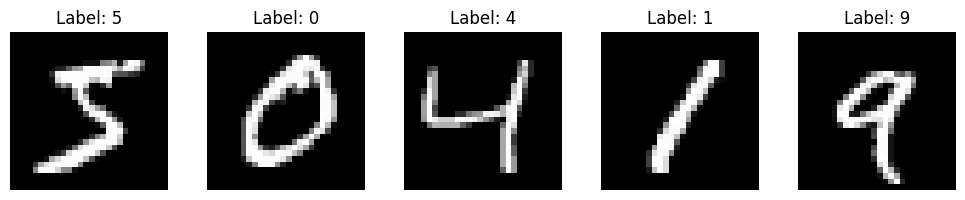

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Load the MNIST dataset directly from Keras
from tensorflow.keras.datasets import mnist

# Load data without requiring a manual download
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print dataset shapes
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

# Visualize some examples
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Preprocess the data

# For traditional ML models (Logistic Regression, RF, XGBoost, SVM)
# Flatten the 28x28 images to 784-dimensional vectors
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Scale pixel values to be between 0 and 1
X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

# For CNN
# Reshape to include channel dimension (MNIST is grayscale, so 1 channel)
X_train_cnn = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test_cnn = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Scale pixel values to be between 0 and 1
X_train_cnn = X_train_cnn / 255.0
X_test_cnn = X_test_cnn / 255.0

print("Flat data shape for traditional ML models:", X_train_flat.shape)
print("CNN data shape:", X_train_cnn.shape)

Flat data shape for traditional ML models: (60000, 784)
CNN data shape: (60000, 28, 28, 1)



=== Logistic Regression ===


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy: 0.9177
Training time: 11.11 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       980
           1       0.95      0.98      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.90      0.90      0.90      1010
           4       0.92      0.93      0.93       982
           5       0.87      0.87      0.87       892
           6       0.93      0.95      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.88      0.87      0.88       974
           9       0.91      0.89      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



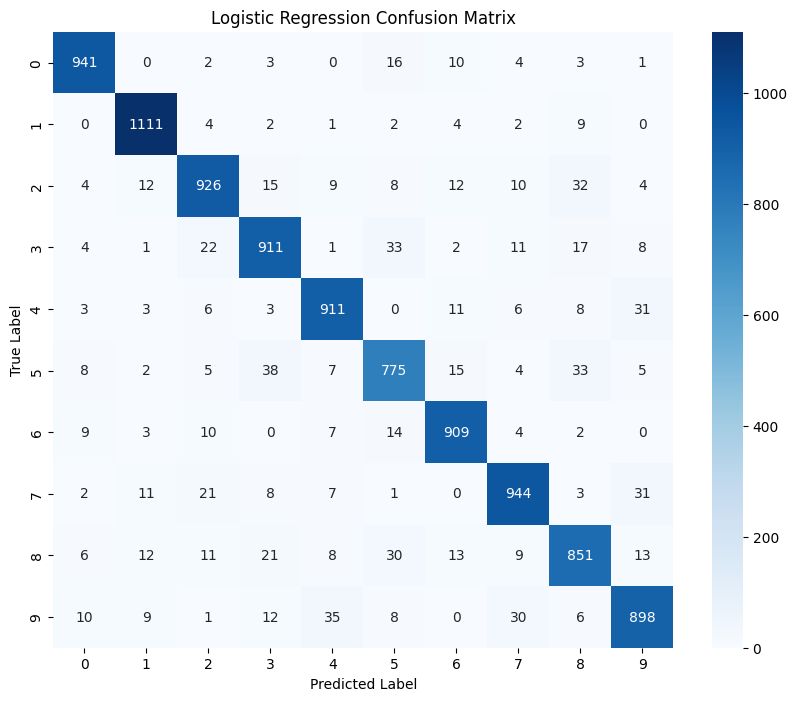

In [ ]:
from sklearn.linear_model import LogisticRegression

# To save time, we'll use a subset of the data for training
# For the full dataset, consider increasing max_iter or removing the sample limit
sample_size = 20000  # Adjust based on your computational resources

print("\n=== Logistic Regression ===")
start_time = time.time()

# Initialize and train the model
lr_model = LogisticRegression(max_iter=100, verbose=1, n_jobs=-1)
lr_model.fit(X_train_flat[:sample_size], y_train[:sample_size])

# Make predictions
lr_preds = lr_model.predict(X_test_flat)

# Evaluate
lr_accuracy = accuracy_score(y_test, lr_preds)
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Training time: {time.time() - start_time:.2f} seconds")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, lr_preds))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, lr_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

###part b:- random forest


=== Random Forest ===
Accuracy: 0.9567
Training time: 12.11 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.95      0.95      1032
           3       0.94      0.96      0.95      1010
           4       0.96      0.95      0.96       982
           5       0.96      0.94      0.95       892
           6       0.96      0.97      0.97       958
           7       0.96      0.95      0.95      1028
           8       0.95      0.93      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



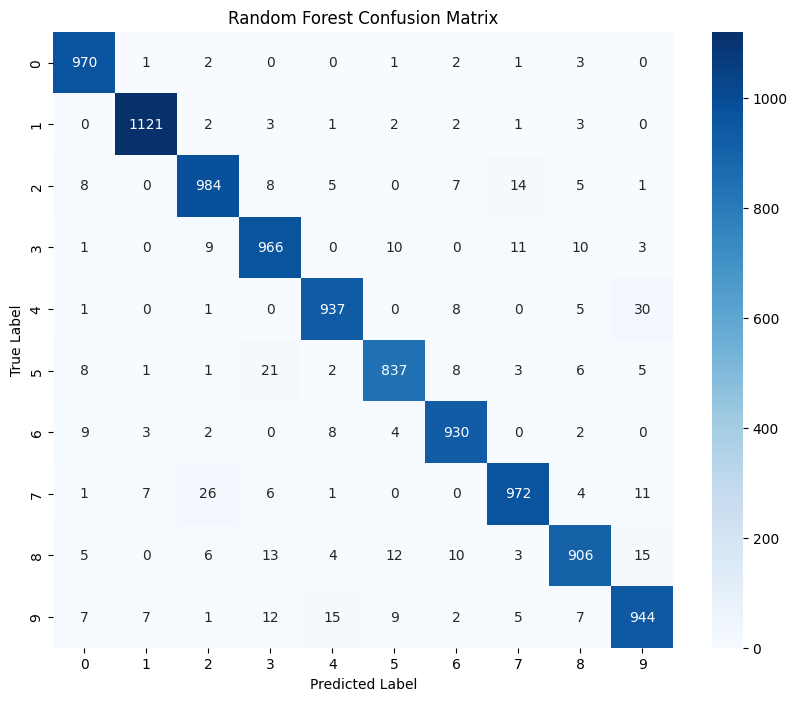

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print("\n=== Random Forest ===")
start_time = time.time()

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_flat[:sample_size], y_train[:sample_size])

# Make predictions
rf_preds = rf_model.predict(X_test_flat)

# Evaluate
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Training time: {time.time() - start_time:.2f} seconds")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_preds))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

###part c:- xgb


=== XGBoost ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:59:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9617
Training time: 274.22 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.96      0.95      1032
           3       0.95      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.95      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.94      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.94      0.95      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



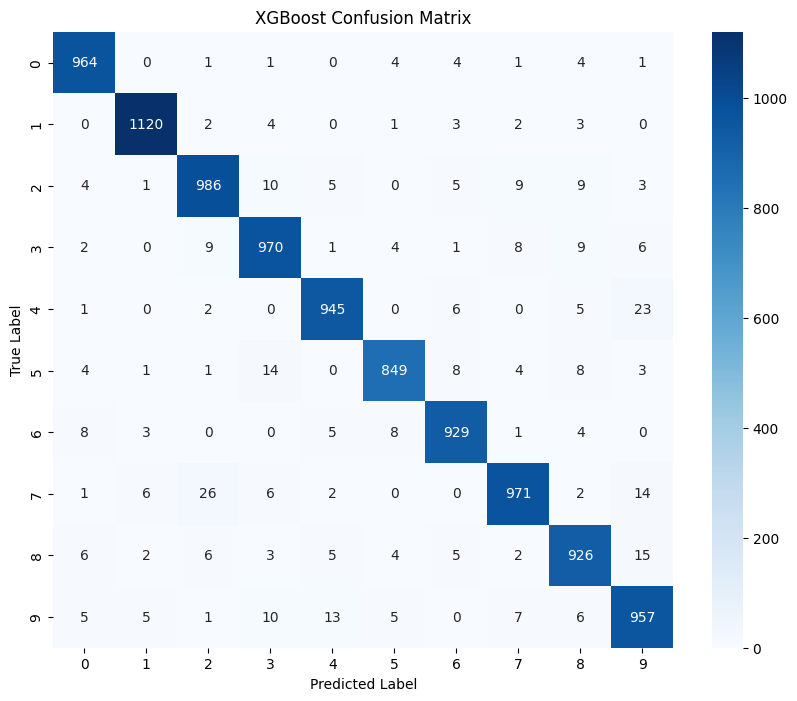

In [ ]:
import xgboost as xgb

print("\n=== XGBoost ===")
start_time = time.time()

# Initialize and train the model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6,
                           use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_flat[:sample_size], y_train[:sample_size])

# Make predictions
xgb_preds = xgb_model.predict(X_test_flat)

# Evaluate
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Training time: {time.time() - start_time:.2f} seconds")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, xgb_preds))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, xgb_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

###part d:- svm



=== Support Vector Machine ===
Accuracy: 0.9542
Training time: 21.84 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.94      0.95      0.95      1010
           4       0.93      0.97      0.95       982
           5       0.95      0.94      0.94       892
           6       0.96      0.97      0.97       958
           7       0.96      0.93      0.95      1028
           8       0.96      0.93      0.94       974
           9       0.94      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



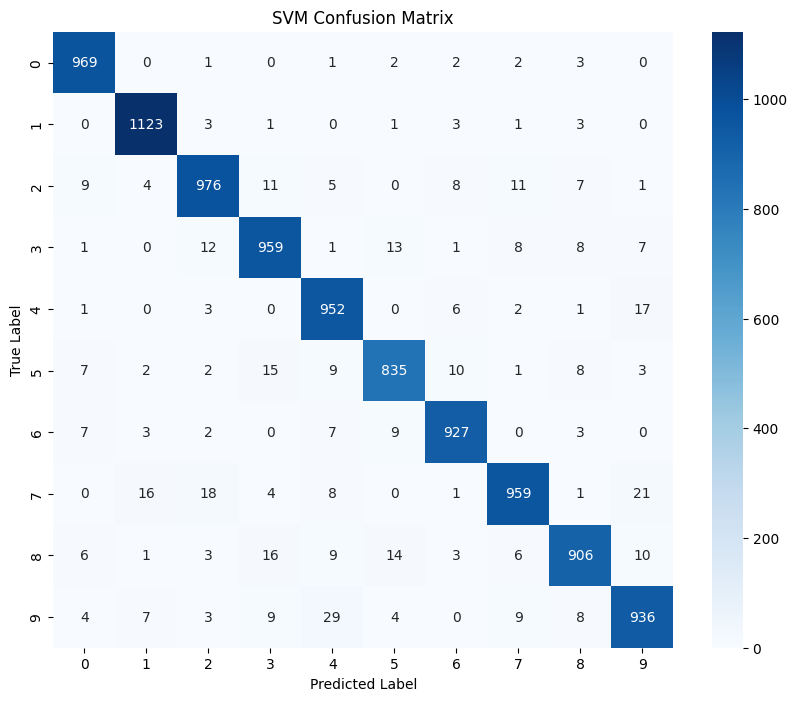

In [ ]:
from sklearn.svm import SVC

print("\n=== Support Vector Machine ===")
start_time = time.time()

# For SVM, we'll use an even smaller subset due to computational constraints
svm_sample_size = 5000  # SVMs can be slow on large datasets

# Initialize and train the model
svm_model = SVC(kernel='rbf', C=10, gamma=0.01)
svm_model.fit(X_train_flat[:svm_sample_size], y_train[:svm_sample_size])

# Make predictions
svm_preds = svm_model.predict(X_test_flat)

# Evaluate
svm_accuracy = accuracy_score(y_test, svm_preds)
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Training time: {time.time() - start_time:.2f} seconds")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, svm_preds))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, svm_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

###main task acc comparisions


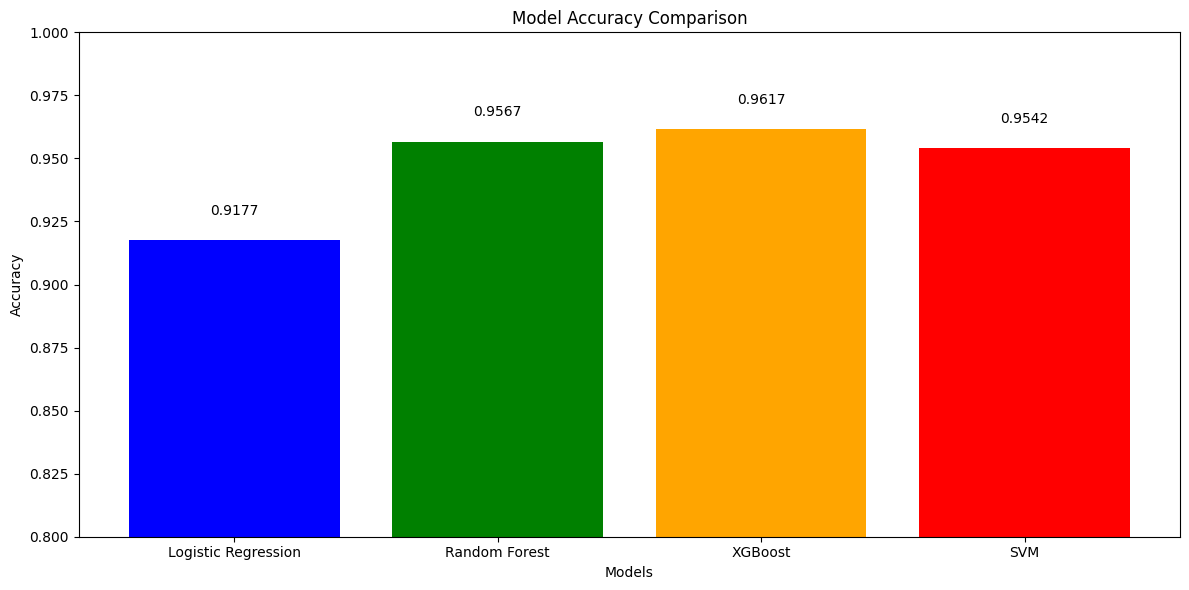

In [ ]:
# First, let's prepare a dictionary to store our results
models_results = {
    'Logistic Regression': lr_accuracy,
    'Random Forest': rf_accuracy,
    'XGBoost': xgb_accuracy,
    'SVM': svm_accuracy
}

# Plot the accuracy comparison
plt.figure(figsize=(12, 6))
models = list(models_results.keys())
accuracies = list(models_results.values())

plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0.80, 1.0)  # Set y-axis to start from 0.8 for better visualization
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Add accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')

plt.tight_layout()
plt.show()

###bonus knn and decision trees

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print("\n=== K-Nearest Neighbors ===")
start_time = time.time()

# For KNN, we'll use a smaller subset due to computational constraints
knn_sample_size = 10000

# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model.fit(X_train_flat[:knn_sample_size], y_train[:knn_sample_size])

# Make predictions
knn_preds = knn_model.predict(X_test_flat)

# Evaluate
knn_accuracy = accuracy_score(y_test, knn_preds)
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Training time: {time.time() - start_time:.2f} seconds")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, knn_preds))

# Add to our results dictionary
models_results['KNN'] = knn_accuracy


=== K-Nearest Neighbors ===
Accuracy: 0.9442
Training time: 5.26 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       980
           1       0.91      0.99      0.95      1135
           2       0.98      0.91      0.94      1032
           3       0.93      0.95      0.94      1010
           4       0.96      0.93      0.95       982
           5       0.96      0.93      0.94       892
           6       0.95      0.98      0.97       958
           7       0.93      0.93      0.93      1028
           8       0.97      0.88      0.93       974
           9       0.92      0.93      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.94      0.94     10000



###decision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

print("\n=== Decision Tree ===")
start_time = time.time()

# Initialize and train the model
dt_model = DecisionTreeClassifier(max_depth=20, random_state=42)
dt_model.fit(X_train_flat[:sample_size], y_train[:sample_size])

# Make predictions
dt_preds = dt_model.predict(X_test_flat)

# Evaluate
dt_accuracy = accuracy_score(y_test, dt_preds)
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Training time: {time.time() - start_time:.2f} seconds")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, dt_preds))

# Add to our results dictionary
models_results['Decision Tree'] = dt_accuracy


=== Decision Tree ===
Accuracy: 0.8423
Training time: 6.10 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       980
           1       0.94      0.95      0.95      1135
           2       0.83      0.81      0.82      1032
           3       0.80      0.80      0.80      1010
           4       0.84      0.86      0.85       982
           5       0.77      0.75      0.76       892
           6       0.84      0.86      0.85       958
           7       0.88      0.88      0.88      1028
           8       0.77      0.75      0.76       974
           9       0.80      0.82      0.81      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### all 6 models comparision


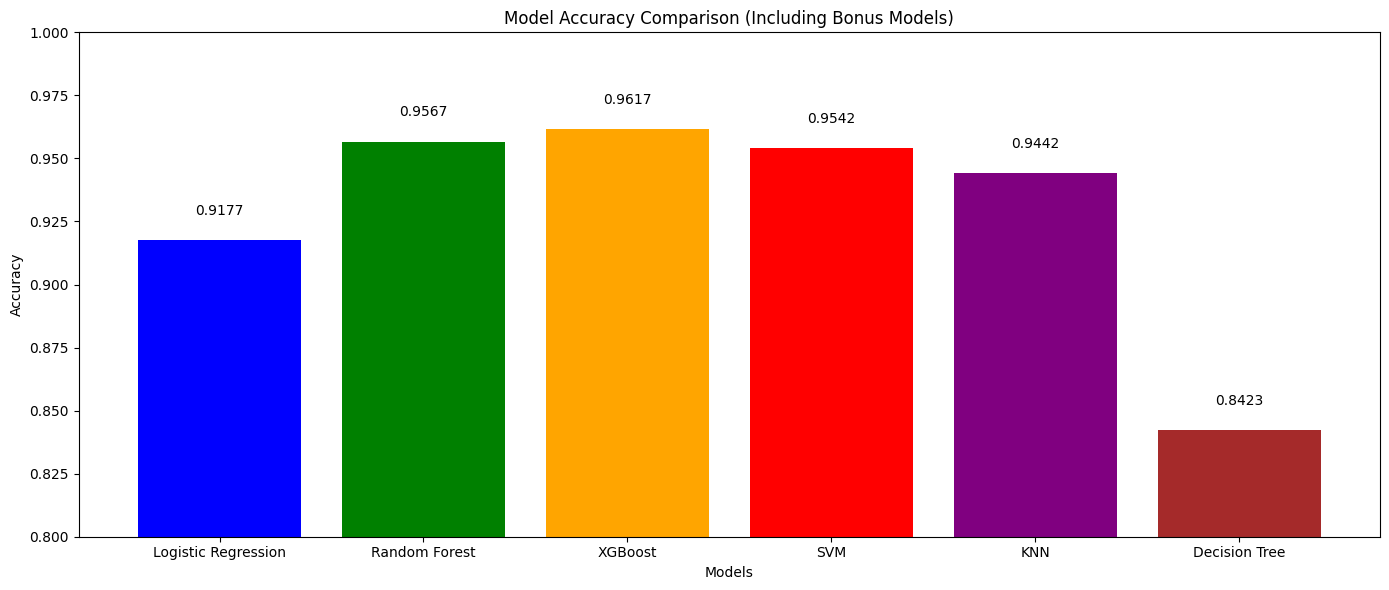

In [ ]:
# Plot the updated accuracy comparison
plt.figure(figsize=(14, 6))
models = list(models_results.keys())
accuracies = list(models_results.values())

plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'brown'])
plt.ylim(0.80, 1.0)  # Set y-axis to start from 0.8 for better visualization
plt.title('Model Accuracy Comparison (Including Bonus Models)')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Add accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')

plt.tight_layout()
plt.show()

###CNN done separately as there was some clash and gpu support was needed

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


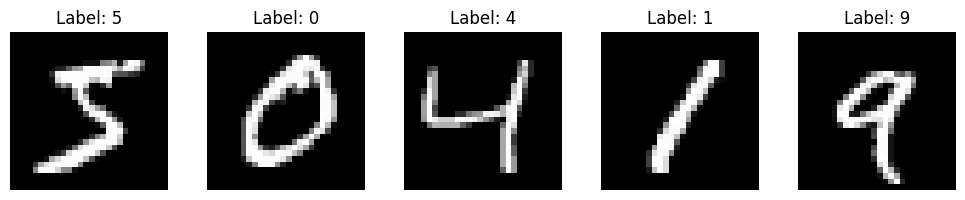

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import time

# Load the MNIST dataset directly (no manual download needed)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print dataset shapes
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

# Visualize some examples
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Reshape images to include channel dimension (MNIST is grayscale, so 1 channel)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert data type to float32 and normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


In [ ]:
def create_cnn_model():
    """
    Create a CNN model for MNIST digit classification
    """
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Second Convolutional Block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax')) # 10 classes for digits 0-9

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

# Create the model
cnn_model = create_cnn_model()

# Print model summary
cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 393,162 (1.50 MB)

 Trainable params: 393,162 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7840 - loss: 0.6418

422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.7843 - loss: 0.6409 - val_accuracy: 0.9880 - val_loss: 0.0427
Epoch 2/15
418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9724 - loss: 0.0921

422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9725 - loss: 0.0920 - val_accuracy: 0.9908 - val_loss: 0.0306
Epoch 3/15
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9815 - loss: 0.0630

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9815 - loss: 0.0630 - val_accuracy: 0.9915 - val_loss: 0.0289
Epoch 4/15
417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9861 - loss: 0.0472

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9861 - loss: 0.0473 - val_accuracy: 0.9925 - val_loss: 0.0254
Epoch 5/15
419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9882 - loss: 0.0413

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9882 - loss: 0.0413 - val_accuracy: 0.9940 - val_loss: 0.0245
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9879 - loss: 0.0395 - val_accuracy: 0.9933 - val_loss: 0.0287
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9899 - loss: 0.0331 - val_accuracy: 0.9932 - val_loss: 0.0243
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9913 - loss: 0.0273 - val_accuracy: 0.9935 - val_loss: 0.0260
Epoch 9/15
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9911 - loss: 0.0280

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9911 - loss: 0.0280 - val_accuracy: 0.9943 - val_loss: 0.0241
Epoch 10/15
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9920 - loss: 0.0259

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9921 - loss: 0.0258 - val_accuracy: 0.9947 - val_loss: 0.0220
Epoch 11/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9932 - loss: 0.0229 - val_accuracy: 0.9938 - val_loss: 0.0257
Epoch 12/15
416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9930 - loss: 0.0230

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9930 - loss: 0.0229 - val_accuracy: 0.9948 - val_loss: 0.0234
Epoch 13/15
416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9935 - loss: 0.0195

422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9935 - loss: 0.0195 - val_accuracy: 0.9953 - val_loss: 0.0265
Epoch 14/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9936 - loss: 0.0196 - val_accuracy: 0.9945 - val_loss: 0.0277
Epoch 15/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9947 - loss: 0.0183 - val_accuracy: 0.9947 - val_loss: 0.0237
Training time: 81.64 seconds


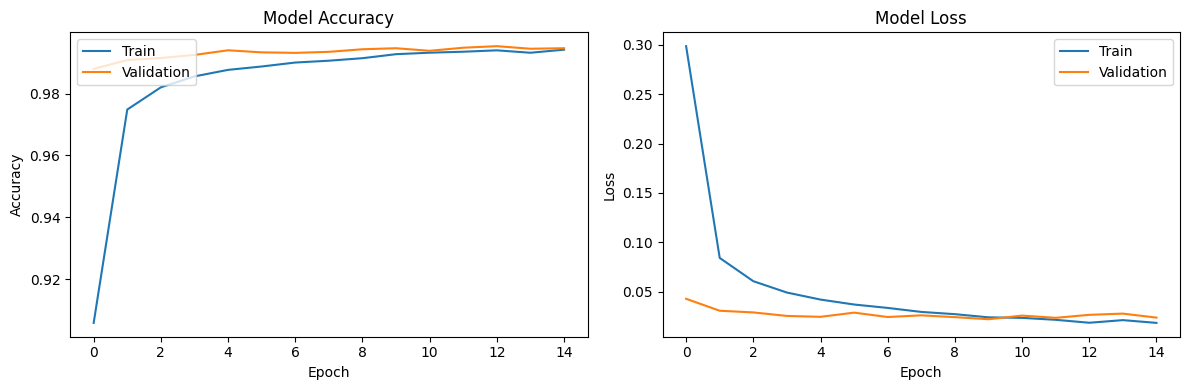

In [ ]:
# Set up callbacks for early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_cnn_model.h5', monitor='val_accuracy',
                                   save_best_only=True, mode='max')

# Start timer
start_time = time.time()

# Train the model
batch_size = 128
epochs = 15

cnn_history = cnn_model.fit(X_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.1,
                            callbacks=[early_stopping, model_checkpoint])

# Calculate training time
training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

Test accuracy: 0.9945
Test loss: 0.0192
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



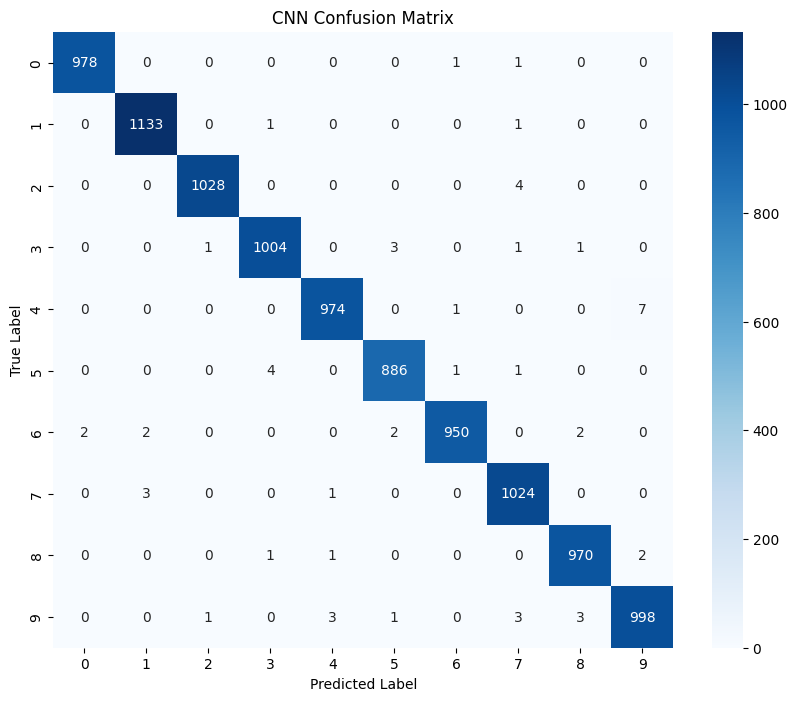

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Make predictions
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

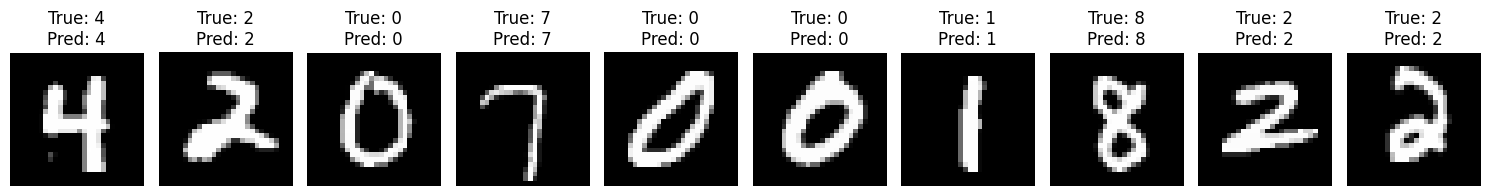

In [ ]:
# Display some example predictions
def plot_example_predictions(X_test, y_true, y_pred, n=5):
    """Plot example predictions with true and predicted labels"""
    indices = np.random.choice(range(len(X_test)), n, replace=False)

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, n, i+1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title(f"True: {y_true[idx]}\nPred: {y_pred[idx]}")
    plt.tight_layout()
    plt.show()

# Plot example predictions
plot_example_predictions(X_test, y_true, y_pred_classes, n=10)

###task 2 - B --- FULLY connected nn using np and pd for mnist

Loading MNIST dataset...
Training neural network with 2 hidden layers: [256, 128]
Epoch 1/15, Train Loss: 0.4244, Train Acc: 0.8659, Val Loss: 0.4419, Val Acc: 0.8645
Epoch 2/15, Train Loss: 0.2818, Train Acc: 0.9192, Val Loss: 0.3194, Val Acc: 0.9115
Epoch 3/15, Train Loss: 0.2459, Train Acc: 0.9280, Val Loss: 0.3069, Val Acc: 0.9120
Epoch 4/15, Train Loss: 0.3267, Train Acc: 0.8899, Val Loss: 0.3837, Val Acc: 0.8840
Epoch 5/15, Train Loss: 0.1818, Train Acc: 0.9413, Val Loss: 0.2628, Val Acc: 0.9220
Epoch 6/15, Train Loss: 0.1052, Train Acc: 0.9716, Val Loss: 0.1906, Val Acc: 0.9460
Epoch 7/15, Train Loss: 0.0876, Train Acc: 0.9758, Val Loss: 0.1868, Val Acc: 0.9475
Epoch 8/15, Train Loss: 0.0840, Train Acc: 0.9762, Val Loss: 0.1922, Val Acc: 0.9450
Epoch 9/15, Train Loss: 0.0549, Train Acc: 0.9874, Val Loss: 0.1703, Val Acc: 0.9515
Epoch 10/15, Train Loss: 0.0500, Train Acc: 0.9883, Val Loss: 0.1734, Val Acc: 0.9495
Epoch 11/15, Train Loss: 0.0449, Train Acc: 0.9902, Val Loss: 0.171

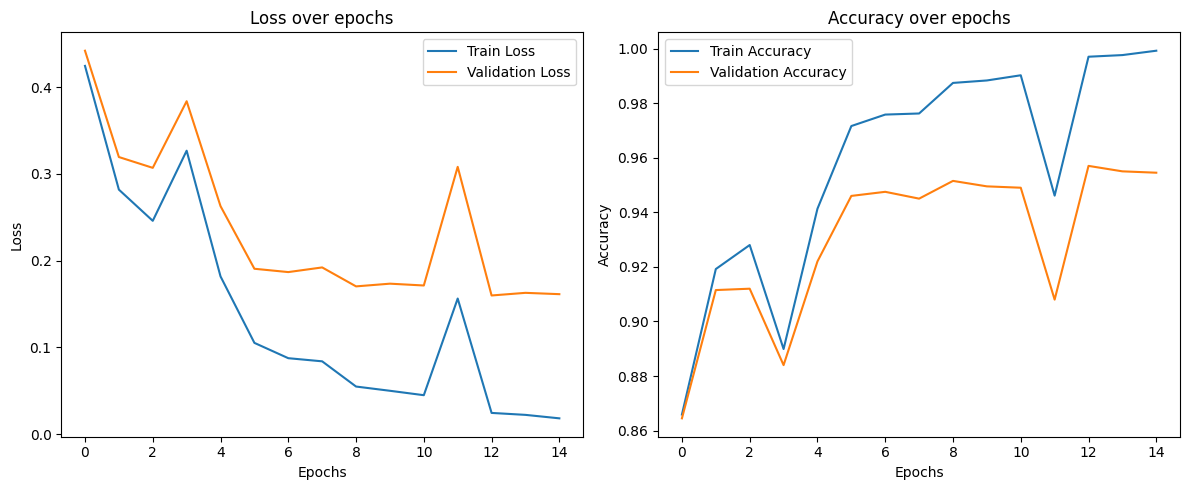

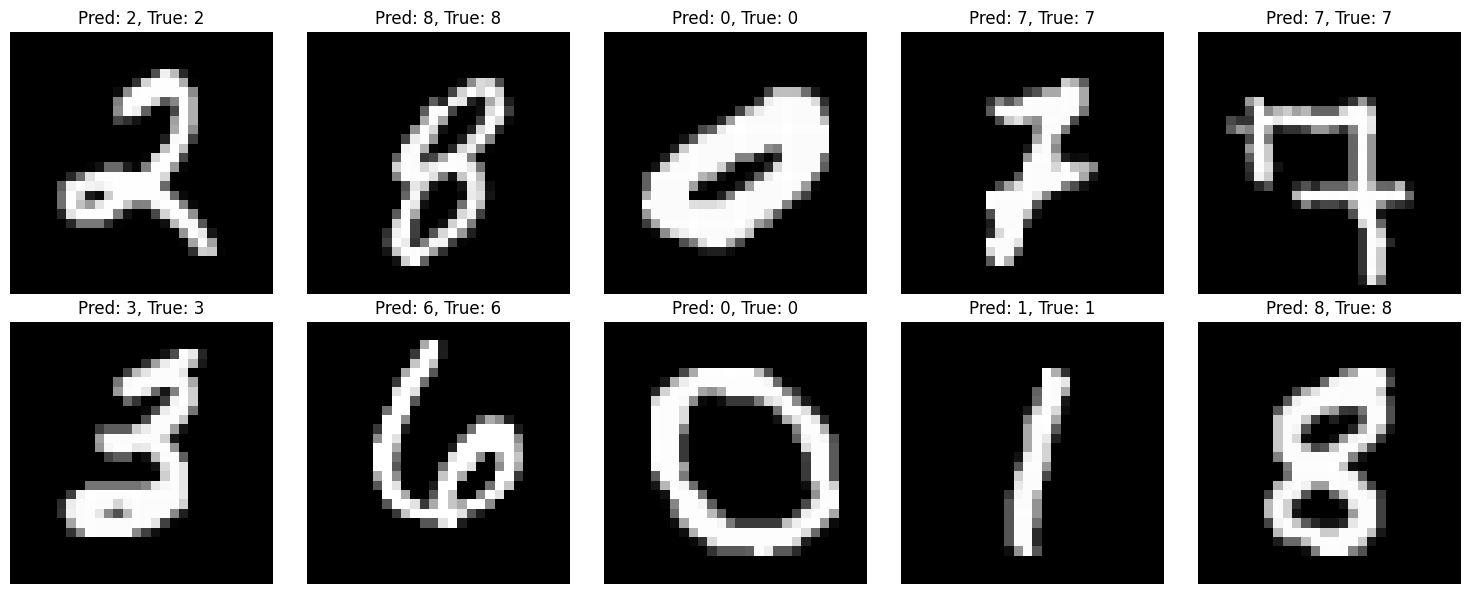

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm

# Set random seed for reproducibility
np.random.seed(42)

class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size

        # Initialize weights and biases using He initialization for better training
        self.parameters = {}

        # Input layer to first hidden layer
        self.parameters['W1'] = np.random.randn(input_size, hidden_sizes[0]) * np.sqrt(2. / input_size)
        self.parameters['b1'] = np.zeros((1, hidden_sizes[0]))

        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            self.parameters[f'W{i+1}'] = np.random.randn(hidden_sizes[i-1], hidden_sizes[i]) * np.sqrt(2. / hidden_sizes[i-1])
            self.parameters[f'b{i+1}'] = np.zeros((1, hidden_sizes[i]))

        # Last hidden layer to output layer
        self.parameters[f'W{len(hidden_sizes)+1}'] = np.random.randn(hidden_sizes[-1], output_size) * np.sqrt(2. / hidden_sizes[-1])
        self.parameters[f'b{len(hidden_sizes)+1}'] = np.zeros((1, output_size))

        self.num_layers = len(hidden_sizes) + 1

    def relu(self, Z):
        """ReLU activation function"""
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        """Derivative of ReLU function"""
        return Z > 0

    def softmax(self, Z):
        """Softmax activation function"""
        # Clip values for numerical stability to avoid overflow
        Z = np.clip(Z, -709, 709)  # Avoid overflow (log(sys.float_info.max) ~ 709)
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))  # For numerical stability
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

    def forward_propagation(self, X):
        """
        Forward propagation through the network

        Parameters:
        - X: input data (batch_size, input_size)

        Returns:
        - A: output activations
        - cache: dictionary with all intermediate values
        """
        cache = {}
        A = X
        cache['A0'] = A

        # Forward through hidden layers with ReLU
        for i in range(1, self.num_layers + 1):
            Z = np.dot(A, self.parameters[f'W{i}']) + self.parameters[f'b{i}']
            cache[f'Z{i}'] = Z

            if i == self.num_layers:  # Output layer
                A = self.softmax(Z)
            else:  # Hidden layers
                A = self.relu(Z)

            cache[f'A{i}'] = A

        return A, cache

    def compute_cost(self, y_pred, y_true):
        """
        Compute cross-entropy loss

        Parameters:
        - y_pred: predicted probabilities (batch_size, output_size)
        - y_true: true one-hot encoded labels (batch_size, output_size)

        Returns:
        - cost: cross-entropy loss
        """
        m = y_true.shape[0]
        # Add small epsilon for numerical stability
        epsilon = 1e-15
        cost = -np.sum(y_true * np.log(y_pred + epsilon)) / m
        return cost

    def backward_propagation(self, cache, y_true):
        """
        Backward propagation to compute gradients

        Parameters:
        - cache: dictionary with values from forward propagation
        - y_true: true one-hot encoded labels

        Returns:
        - gradients: dictionary with gradients for each parameter
        """
        m = y_true.shape[0]
        gradients = {}

        # Output layer
        dZ = cache[f'A{self.num_layers}'] - y_true

        for i in range(self.num_layers, 0, -1):
            gradients[f'dW{i}'] = np.dot(cache[f'A{i-1}'].T, dZ) / m
            gradients[f'db{i}'] = np.sum(dZ, axis=0, keepdims=True) / m

            if i > 1:  # Not the first layer
                dA = np.dot(dZ, self.parameters[f'W{i}'].T)
                dZ = dA * self.relu_derivative(cache[f'Z{i-1}'])

        return gradients

    def update_parameters(self, gradients, learning_rate):
        """
        Update parameters using gradient descent

        Parameters:
        - gradients: dictionary with gradients
        - learning_rate: learning rate for gradient descent
        """
        for i in range(1, self.num_layers + 1):
            self.parameters[f'W{i}'] -= learning_rate * gradients[f'dW{i}']
            self.parameters[f'b{i}'] -= learning_rate * gradients[f'db{i}']

    def train(self, X, y, X_val, y_val, epochs, batch_size, learning_rate):
        """
        Train the neural network

        Parameters:
        - X: training data
        - y: training labels (one-hot encoded)
        - X_val: validation data
        - y_val: validation labels (one-hot encoded)
        - epochs: number of training epochs
        - batch_size: size of mini-batches
        - learning_rate: learning rate for gradient descent

        Returns:
        - history: dictionary with training metrics
        """
        m = X.shape[0]
        history = {
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': []
        }

        for epoch in range(epochs):
            # Shuffle training data
            permutation = np.random.permutation(m)
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]

            # Mini-batch gradient descent
            for i in range(0, m, batch_size):
                end = min(i + batch_size, m)
                X_batch = X_shuffled[i:end]
                y_batch = y_shuffled[i:end]

                # Forward propagation
                y_pred, cache = self.forward_propagation(X_batch)

                # Backward propagation
                gradients = self.backward_propagation(cache, y_batch)

                # Update parameters
                self.update_parameters(gradients, learning_rate)

            # Compute metrics for this epoch
            train_pred, _ = self.forward_propagation(X)
            train_loss = self.compute_cost(train_pred, y)
            train_acc = self.compute_accuracy(train_pred, y)

            val_pred, _ = self.forward_propagation(X_val)
            val_loss = self.compute_cost(val_pred, y_val)
            val_acc = self.compute_accuracy(val_pred, y_val)

            history['train_loss'].append(train_loss)
            history['train_acc'].append(train_acc)
            history['val_loss'].append(val_loss)
            history['val_acc'].append(val_acc)

            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

        return history

    def compute_accuracy(self, y_pred, y_true):
        """
        Compute accuracy

        Parameters:
        - y_pred: predicted probabilities
        - y_true: true one-hot encoded labels

        Returns:
        - accuracy: proportion of correct predictions
        """
        y_pred_class = np.argmax(y_pred, axis=1)
        y_true_class = np.argmax(y_true, axis=1)
        accuracy = np.mean(y_pred_class == y_true_class)
        return accuracy

    def predict(self, X):
        """Make predictions for input data"""
        y_pred, _ = self.forward_propagation(X)
        y_pred_class = np.argmax(y_pred, axis=1)
        return y_pred_class


def main():
    # Load MNIST dataset
    print("Loading MNIST dataset...")
    mnist = fetch_openml('mnist_784', version=1, parser='auto')

    # Convert to numpy arrays for easier handling
    X = mnist.data.to_numpy().astype('float32') / 255.0  # Normalize to [0, 1]
    y = mnist.target.to_numpy().astype('int')

    # Create training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # One-hot encode the labels
    encoder = OneHotEncoder(sparse_output=False)
    y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))
    y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))

    # Create a smaller dataset for faster training (optional)
    # Comment this section out to train on the full dataset
    train_samples = 10000
    test_samples = 2000
    X_train_small = X_train[:train_samples]
    y_train_small = y_train_one_hot[:train_samples]
    X_test_small = X_test[:test_samples]
    y_test_small = y_test_one_hot[:test_samples]

    # Network parameters
    input_size = 784  # 28x28 pixels
    hidden_sizes = [256, 128]  # Two hidden layers with more neurons
    output_size = 10  # 10 digits (0-9)

    # Training hyperparameters
    epochs = 15
    batch_size = 64  # Smaller batch size can help with learning
    learning_rate = 0.1  # Larger learning rate for faster convergence

    # Create and train the neural network
    nn = NeuralNetwork(input_size, hidden_sizes, output_size)
    print(f"Training neural network with {len(hidden_sizes)} hidden layers: {hidden_sizes}")

    history = nn.train(
        X_train_small, y_train_small,
        X_test_small, y_test_small,
        epochs, batch_size, learning_rate
    )

    # Evaluate on test set
    y_pred_test = nn.predict(X_test_small)
    y_true_test = np.argmax(y_test_small, axis=1)
    test_accuracy = np.mean(y_pred_test == y_true_test)
    print(f"Final test accuracy: {test_accuracy:.4f}")

    # Plot training history
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Visualize some predictions
    n_samples = 10
    indices = np.random.choice(len(X_test_small), n_samples)

    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test_small[idx].reshape(28, 28), cmap='gray')
        pred = nn.predict(X_test_small[idx:idx+1])[0]
        true = y_true_test[idx]
        plt.title(f"Pred: {pred}, True: {true}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()

###Task-3 Customer personality analysis

In [ ]:
###visit github link https://github.com/ANANDA-SWAROOP/data_analytics_anandaswaroop for the code and documentation
###the app is hosted at https://anandasigmaapp-dopdnjyymbvuvsjemcqhlv.streamlit.app/ pls visit the site

###steps followed by me to understand
1. open the dataset in excel
2. use the excel extension to first get an understanding of the dataset (mainly the campain cols)
3. find the main attributes or the features to focus
4. clean dataset and (had to make sure 0 div errors also)
5. feature engineering (hard, opensource contrib ps:)
6. clustering silhouetee score analysis and streamlit

<ipython-input-2-ee5a2dc8659d>:25: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Dt_Customer'] = pd.to_datetime(


Silhouette Score: 0.128
PCA Variance Explained: [0.25984682 0.10822898]
   Cluster      PCA1      PCA2
0        2  4.976350 -0.772917
1        0 -2.748056  0.164041
2        2  1.413980 -0.496119
3        0 -2.880148 -1.904878
4        3 -0.256537 -0.587145


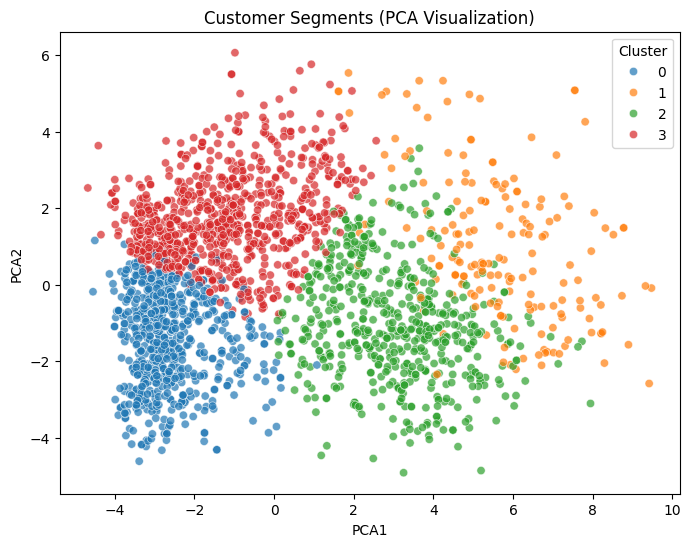

<ipython-input-2-ee5a2dc8659d>:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data, palette='tab10')


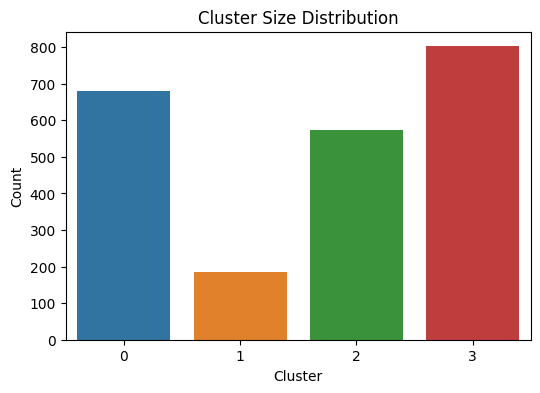

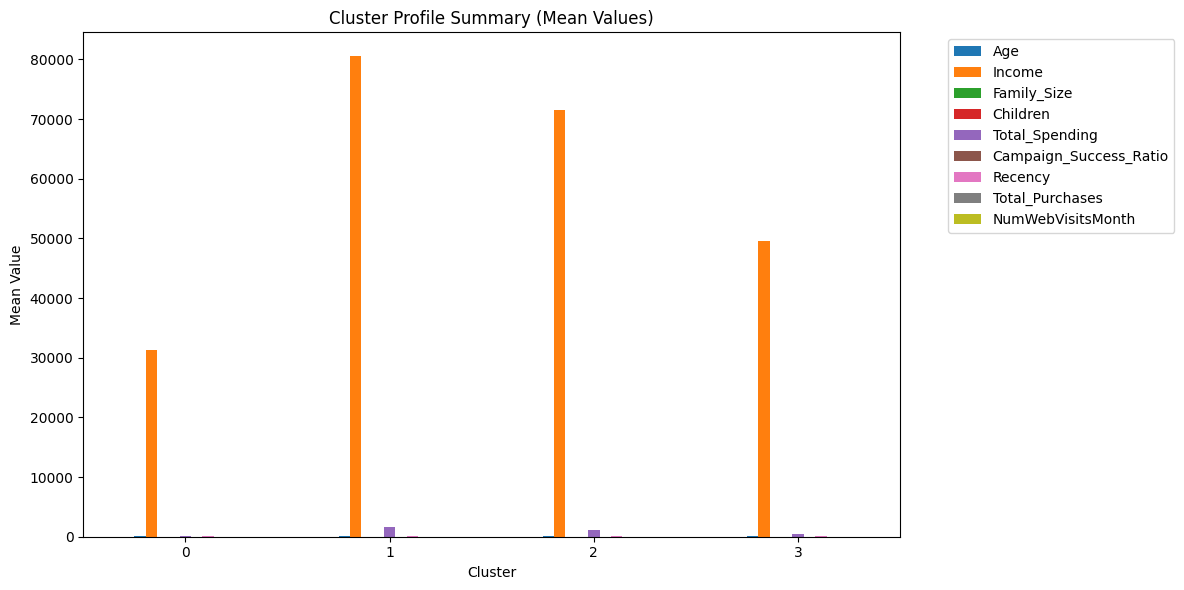

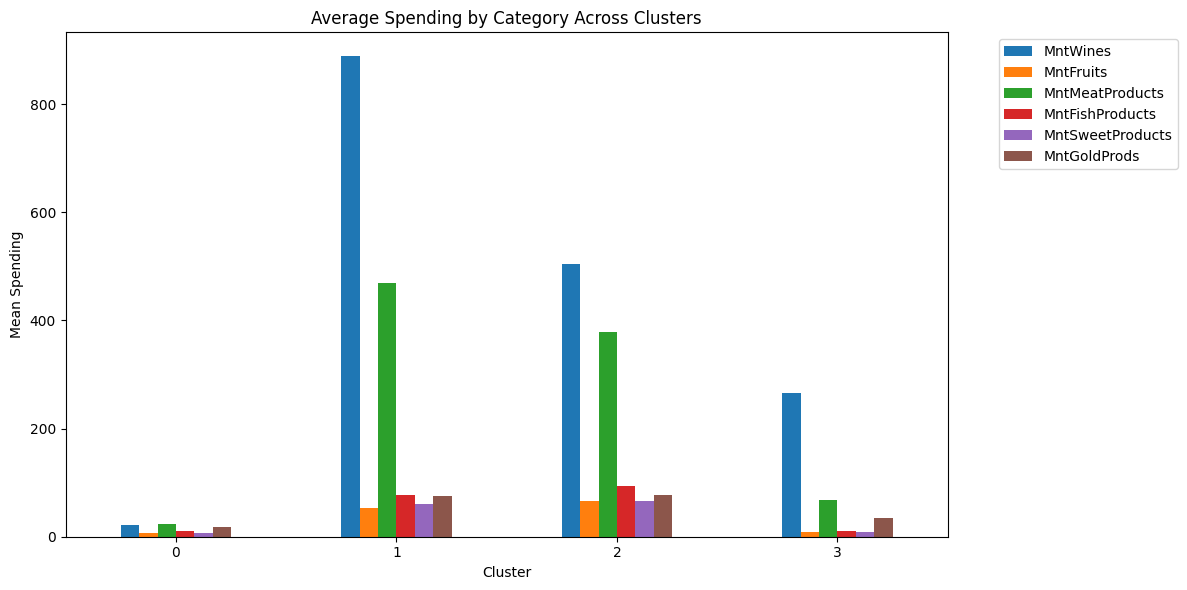

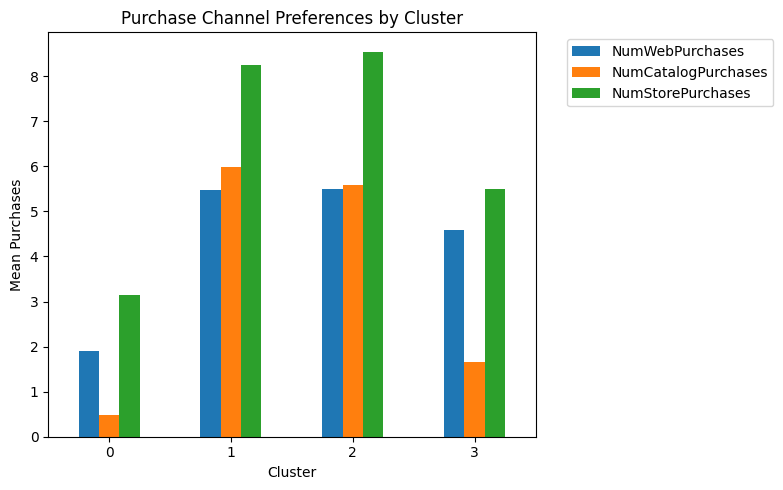

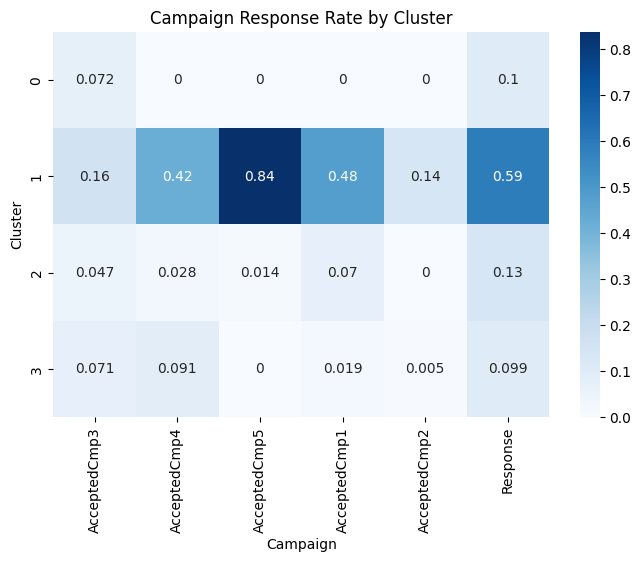

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(df):
    data = df.copy()
    # Fill missing values
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())
    categorical_cols = data.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

    # Feature Engineering
    current_year = pd.Timestamp.now().year
    if 'Year_Birth' in data.columns:
        data['Age'] = current_year - data['Year_Birth']

    if 'Dt_Customer' in data.columns:
        data['Dt_Customer'] = pd.to_datetime(
            data['Dt_Customer'], errors='coerce', dayfirst=True, infer_datetime_format=True
        )
        if data['Dt_Customer'].isnull().any():
            data.loc[data['Dt_Customer'].isnull(), 'Dt_Customer'] = pd.to_datetime(
                data.loc[data['Dt_Customer'].isnull(), 'Dt_Customer'],
                errors='coerce', dayfirst=False, infer_datetime_format=True
            )
        data['Customer_Days'] = (pd.Timestamp.now() - data['Dt_Customer']).dt.days
        data['Customer_Years'] = data['Customer_Days'] / 365.25

    if 'Kidhome' in data.columns and 'Teenhome' in data.columns:
        data['Family_Size'] = 1 + data['Kidhome'] + data['Teenhome']
        data['Children'] = data['Kidhome'] + data['Teenhome']

    spending_cols = [col for col in data.columns if col.startswith('Mnt')]
    if spending_cols:
        data['Total_Spending'] = data[spending_cols].sum(axis=1)
        for col in spending_cols:
            category = col[3:]
            data[f'Ratio_{category}'] = data[col] / data['Total_Spending'].replace(0, np.nan)
            data[f'Ratio_{category}'] = data[f'Ratio_{category}'].fillna(0)

    purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
    if all(col in data.columns for col in purchase_cols):
        data['Total_Purchases'] = data[purchase_cols].sum(axis=1)
        for col in purchase_cols:
            channel = col[3:-9]
            data[f'Ratio_{channel}'] = data[col] / data['Total_Purchases'].replace(0, np.nan)
            data[f'Ratio_{channel}'] = data[f'Ratio_{channel}'].fillna(0)

    campaign_cols = [col for col in data.columns if col.startswith('Accepted')]
    if campaign_cols:
        data['Campaign_Success'] = data[campaign_cols].sum(axis=1)
        data['Campaign_Success_Ratio'] = data['Campaign_Success'] / len(campaign_cols)

    if 'Income' in data.columns and 'Family_Size' in data.columns:
        data['Income_per_person'] = data['Income'] / data['Family_Size']

    if 'Total_Spending' in data.columns and 'Total_Purchases' in data.columns:
        data['Avg_Spending_per_Purchase'] = data['Total_Spending'] / data['Total_Purchases'].replace(0, np.nan)
        data['Avg_Spending_per_Purchase'] = data['Avg_Spending_per_Purchase'].fillna(0)

    education_mapping = {
        'Basic': 0, '2n Cycle': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4
    }
    if 'Education' in data.columns:
        if data['Education'].nunique() <= 10:
            known_values = set(education_mapping.keys())
            actual_values = set(data['Education'].unique())
            if actual_values.issubset(known_values):
                data['Education_Level'] = data['Education'].map(education_mapping)
            else:
                data = pd.get_dummies(data, columns=['Education'], prefix='Edu')

    categorical_cols = ['Marital_Status']
    categorical_cols = [col for col in categorical_cols if col in data.columns]
    if categorical_cols:
        data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

    skewed_features = ['Income', 'Total_Spending']
    skewed_features = [col for col in skewed_features if col in data.columns]
    for feature in skewed_features:
        if (data[feature] > 0).all():
            data[f'{feature}_Log'] = np.log1p(data[feature])

    return data

def perform_clustering(data, n_clusters=4, random_state=42):
    features = []
    demographic_cols = ['Age', 'Income', 'Family_Size', 'Children']
    features.extend([col for col in demographic_cols if col in data.columns])
    spending_cols = [col for col in data.columns if col.startswith('Mnt') or col.startswith('Ratio_')]
    features.extend([col for col in spending_cols if col in data.columns])
    purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                     'NumDealsPurchases', 'NumWebVisitsMonth']
    features.extend([col for col in purchase_cols if col in data.columns])
    campaign_cols = [col for col in data.columns if col.startswith('Accepted') or col == 'Response']
    features.extend([col for col in campaign_cols if col in data.columns])
    relationship_cols = ['Recency', 'Customer_Years', 'Complain']
    features.extend([col for col in relationship_cols if col in data.columns])
    additional_cols = ['Campaign_Success_Ratio', 'Avg_Spending_per_Purchase', 'Total_Spending']
    features.extend([col for col in additional_cols if col in data.columns])
    features = [f for f in features if data[f].dtype in ['int64', 'float64']]
    features = list(dict.fromkeys(features))
    X = data[features].copy()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    data['Cluster'] = kmeans.fit_predict(X_scaled)
    silhouette = round(silhouette_score(X_scaled, data['Cluster']), 3)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X_scaled)
    data['PCA1'] = pca_result[:, 0]
    data['PCA2'] = pca_result[:, 1]
    return data, kmeans, features, silhouette, pca.explained_variance_ratio_

def plot_pca_clusters(data):
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        x='PCA1', y='PCA2', hue='Cluster', palette='tab10', data=data, alpha=0.7
    )
    plt.title('Customer Segments (PCA Visualization)')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend(title='Cluster')
    plt.show()

def plot_cluster_distribution(data):
    plt.figure(figsize=(6,4))
    sns.countplot(x='Cluster', data=data, palette='tab10')
    plt.title('Cluster Size Distribution')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.show()

def plot_cluster_profiles(data):
    profile_metrics = [
        'Age', 'Income', 'Family_Size', 'Children', 'Total_Spending',
        'Campaign_Success_Ratio', 'Recency', 'Total_Purchases', 'NumWebVisitsMonth'
    ]
    profile_metrics = [metric for metric in profile_metrics if metric in data.columns]
    profile_summary = data.groupby('Cluster')[profile_metrics].mean()
    profile_summary.plot(kind='bar', figsize=(12,6))
    plt.title('Cluster Profile Summary (Mean Values)')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def plot_spending_by_cluster(data):
    spending_cols = [col for col in data.columns if col.startswith('Mnt')]
    if spending_cols:
        spending_by_cluster = data.groupby('Cluster')[spending_cols].mean()
        spending_by_cluster.plot(kind='bar', figsize=(12,6))
        plt.title('Average Spending by Category Across Clusters')
        plt.ylabel('Mean Spending')
        plt.xticks(rotation=0)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

def plot_purchase_channel_by_cluster(data):
    purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
    if all(col in data.columns for col in purchase_cols):
        purchases_by_cluster = data.groupby('Cluster')[purchase_cols].mean()
        purchases_by_cluster.plot(kind='bar', figsize=(8,5))
        plt.title('Purchase Channel Preferences by Cluster')
        plt.ylabel('Mean Purchases')
        plt.xticks(rotation=0)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

def plot_campaign_response_by_cluster(data):
    campaign_cols = [col for col in data.columns if col.startswith('Accepted') or col == 'Response']
    if campaign_cols:
        campaign_response = data.groupby('Cluster')[campaign_cols].mean()
        plt.figure(figsize=(8,5))
        sns.heatmap(campaign_response, annot=True, cmap='Blues')
        plt.title('Campaign Response Rate by Cluster')
        plt.ylabel('Cluster')
        plt.xlabel('Campaign')
        plt.show()

# Example usage in Colab:
if __name__ == "__main__":
    # Load your data
    df = pd.read_csv("https://raw.githubusercontent.com/ANANDA-SWAROOP/data_analytics_anandaswaroop/refs/heads/main/Customer_Segmentation_Dataset.csv")
    processed = preprocess_data(df)
    clustered, kmeans, features, sil, pca_var = perform_clustering(processed, n_clusters=4)
    print("Silhouette Score:", sil)
    print("PCA Variance Explained:", pca_var)
    print(clustered[['Cluster', 'PCA1', 'PCA2']].head())

    # Visualizations
    plot_pca_clusters(clustered)
    plot_cluster_distribution(clustered)
    plot_cluster_profiles(clustered)
    plot_spending_by_cluster(clustered)
    plot_purchase_channel_by_cluster(clustered)
    plot_campaign_response_by_cluster(clustered)